In [8]:
%pip install pandas
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the dataset to inspect its structure and contents
file_path = '/Users/parthsangani/Documents/AgorasHealth/CMS Data Scripts/tables/Medicare_GV_by_National_State_County_2022.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
data.head()

/var/folders/47/l9k2yjd11vq9mpq5kblrlkvh0000gn/T/ipykernel_18347/1030256663.py:5: DtypeWarning: Columns (223,224) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,YEAR,BENE_GEO_LVL,BENE_GEO_DESC,BENE_GEO_CD,BENE_AGE_LVL,BENES_TOTAL_CNT,BENES_WTH_PTAPTB_CNT,BENES_FFS_CNT,BENES_MA_CNT,MA_PRTCPTN_RATE,...,PQI11_BCTRL_PNA_AGE_LT_65,PQI11_BCTRL_PNA_AGE_65_74,PQI11_BCTRL_PNA_AGE_GE_75,PQI12_UTI_AGE_LT_65,PQI12_UTI_AGE_65_74,PQI12_UTI_AGE_GE_75,PQI15_ASTHMA_AGE_LT_40,PQI16_LWRXTRMTY_AMPUTN_AGE_LT_65,PQI16_LWRXTRMTY_AMPUTN_AGE_65_74,PQI16_LWRXTRMTY_AMPUTN_AGE_GE_75
0,2014,National,National,NaN,All,56767775,49302821,33462969,15839852,0.3213,...,686,499,1373,361,269,1120,286,147,50,47
1,2014,National,National,NaN,<65,9286837,7824336,5867170,1957166,0.2501,...,686,NaN,NaN,361,NaN,NaN,286,147,NaN,NaN
2,2014,National,National,NaN,>=65,47480938,41478485,27595799,13882686,0.3347,...,NaN,499,1373,NaN,269,1120,NaN,NaN,50,47
3,2014,State,AK,2.0,All,84573,71860,71383,477,0.0066,...,622,366,1271,181,152,703,*,130,*,72
4,2014,State,AK,2.0,<65,13294,11641,11578,63,0.0054,...,622,NaN,NaN,181,NaN,NaN,*,130,NaN,NaN


In [4]:
# Convert the 'BENES_TOTAL_CNT' and 'MA_PRTCPTN_RATE' columns to numeric, coercing errors to NaN
data['BENES_TOTAL_CNT'] = pd.to_numeric(data['BENES_TOTAL_CNT'], errors='coerce')
data['MA_PRTCPTN_RATE'] = pd.to_numeric(data['MA_PRTCPTN_RATE'], errors='coerce')

# Now apply the groupby and aggregation after cleaning the data
regional_spending = data.groupby('BENE_GEO_DESC').agg({
    'BENES_TOTAL_CNT': 'sum', 
    'MA_PRTCPTN_RATE': 'mean'
}).reset_index()

# Display the first few rows of the aggregated regional data
regional_spending.head()

,BENE_GEO_DESC,BENES_TOTAL_CNT,MA_PRTCPTN_RATE
0,AK,1821402.0,0.012507
1,AK-Aleutians East,1519.0,0.000000
2,AK-Aleutians West,2211.0,0.000000
3,AK-Anchorage,351179.0,0.015878
4,AK-Bethel,13580.0,0.000000


In [5]:
# Converting relevant columns to numeric, forcing errors to NaN for invalid entries
data['BENES_TOTAL_CNT'] = pd.to_numeric(data['BENES_TOTAL_CNT'], errors='coerce')
data['MA_PRTCPTN_RATE'] = pd.to_numeric(data['MA_PRTCPTN_RATE'], errors='coerce')

# Now group the data by region (state) to analyze Medicare spending and participation
regional_spending_cleaned = data.groupby('BENE_GEO_DESC').agg({
    'BENES_TOTAL_CNT': 'sum', 
    'MA_PRTCPTN_RATE': 'mean'
}).reset_index()

# Display the cleaned regional data
regional_spending_cleaned.head()

,BENE_GEO_DESC,BENES_TOTAL_CNT,MA_PRTCPTN_RATE
0,AK,1821402.0,0.012507
1,AK-Aleutians East,1519.0,0.000000
2,AK-Aleutians West,2211.0,0.000000
3,AK-Anchorage,351179.0,0.015878
4,AK-Bethel,13580.0,0.000000


In [6]:
# Converting relevant columns to numeric, forcing errors to NaN for invalid entries
data['BENES_TOTAL_CNT'] = pd.to_numeric(data['BENES_TOTAL_CNT'], errors='coerce')
data['MA_PRTCPTN_RATE'] = pd.to_numeric(data['MA_PRTCPTN_RATE'], errors='coerce')

# Now group the data by region (state) to analyze Medicare spending and participation
regional_spending_cleaned = data.groupby('BENE_GEO_DESC').agg({
    'BENES_TOTAL_CNT': 'sum', 
    'MA_PRTCPTN_RATE': 'mean'
}).reset_index()

# Display the cleaned regional data
regional_spending_cleaned.head()

,BENE_GEO_DESC,BENES_TOTAL_CNT,MA_PRTCPTN_RATE
0,AK,1821402.0,0.012507
1,AK-Aleutians East,1519.0,0.000000
2,AK-Aleutians West,2211.0,0.000000
3,AK-Anchorage,351179.0,0.015878
4,AK-Bethel,13580.0,0.000000


In [7]:
# Sorting regions by the total number of Medicare beneficiaries to identify regions with high healthcare demand
high_spending_regions = regional_spending_cleaned.sort_values(by='BENES_TOTAL_CNT', ascending=False).head(10)

# Display the top 10 regions with the highest Medicare spending
high_spending_regions

,BENE_GEO_DESC,BENES_TOTAL_CNT,MA_PRTCPTN_RATE
2124,National,1.128579e+09,0.387448
197,CA,1.149990e+08,0.436970
349,FL,8.316810e+07,0.480111
2623,TX,7.602429e+07,0.417696
2060,NY,6.673422e+07,0.428759
2332,PA,5.049448e+07,0.451393
2125,OH,4.321504e+07,0.444385
733,IL,4.124404e+07,0.274944
1286,MI,3.806048e+07,0.402741
1719,NC,3.633039e+07,0.371811


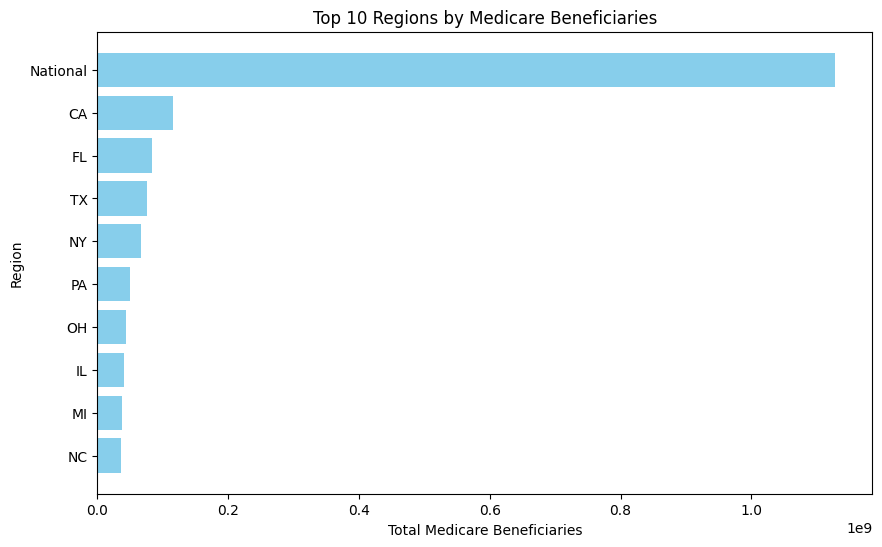

In [9]:
import matplotlib.pyplot as plt

# Sorting regions by the total number of Medicare beneficiaries to identify regions with high healthcare demand
high_spending_regions = regional_spending_cleaned.sort_values(by='BENES_TOTAL_CNT', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(high_spending_regions['BENE_GEO_DESC'], high_spending_regions['BENES_TOTAL_CNT'], color='skyblue')
plt.xlabel('Total Medicare Beneficiaries')
plt.ylabel('Region')
plt.title('Top 10 Regions by Medicare Beneficiaries')
plt.gca().invert_yaxis()  # To display the highest values at the top
plt.show()
